## Mod 1 Project Submission

**John Kline**  
**FT Data Science Online**  
James / Rafael  
_Scheduled review - Monday, Oct. 28 11AM PST_  
Blog Post URL TBD  

***

Exploratory Data Analysis Approach Summary:
1. **Import & Review Data File(s)**
    - Check columns with .describe, .info  
    - Review column data types  
    - Identify null values  
<br>
2. **Review Data Content & Plan Analysis**  
    - Check histograms - continuous, binary, categorical data  
    - Evaluate correlations between different dependent variables  
    - Review data for outliers  
    - Identify dependent variable, potential independent variables  
<br>
3. **Narrow Down Variables, Transform Variables**  
    - Kill off obvious unusable variables  
    - Evaluate normality of target variables  
    - Decide on transformations / normalizations / standardizations  
<br>
4. **Run Core Analyses**  
    - Create core multivariate analysis  
    - Create grouped multivariate analyses  
    - Evaluate statistical validity (p-values, skewness, kurtosis)  
    - Evaluate applicability (size of the effect, direction, does it make sense  
<br>
5. **Run Checks & Create Visuals**  
    - Check alternate models, check alternate explanations of effects
    - Create easy to consume graphs / maps of data
    

<div class="alert alert-block alert-info">

## 1. Import & Review Data File(s)
    - Check columns with .describe, .info  
    - Review column data types  
    - Identify null values  

<div class="alert alert-block alert-info">

We have several important features of homes included in the dataset, as well as one obvious dependent variable - price.  The most obvious line of analysis is to investigate the relationship between various home features (e.g. bedrooms, living space sqft, etc.) and the house price. The data is collected over a relatively narrow time period - 2014-2015, so limited macro price growth in the market should be visible in the data.  One of the more interesting areas of dispersion is likely the effect of geography on price.

|**Category**| Description | _Initial commentary_|
|---:|:---|:---|
|**id** | unique identified for a house |_definite keeper - unique id for joining tables_|
|**dateDate** | house was sold  |_narrow date range - may be hard to establish a pattern_|
| **pricePrice** |  is prediction target |_obvious dependent variable_|
| **bedroomsNumber** |  of Bedrooms/House |_important - classic one-line description of house size_|
| **bathroomsNumber** |  of bathrooms/bedrooms| _probably just tracks w/ bedrooms_|
| **sqft_livings** |  footage of the home| _important - you can have 2 4-br homes of wildly diff size_|
| **sqft_lot** |  footage of the lot |_important probably_|
| **floorsTotal** |  floors levels) in house | _unclear_|
| **waterfront** | House which has a view to a waterfront |_probably a positive predictor_|
| **view** | Has been viewed  | _unclear_|
| **condition** | How good the condition is ( Overall )| _hopefully a good indicator of quality apart from size_|
| **grade** | overall grade given to the housing unit, based on King County grading system | _unclear_|
| **sqft_above** | square footage of house apart from basement |_unclear value vs livingsquare_|
| **sqft_basement** | square footage of the basement |_unclear_|
| **yr_built** | Built Year |_unclear_|
| **yr_renovated** | Year when house was renovated |_probably a positive predictor_|
| **zipcode** | zip |_useful categorical_|
| **lat** | Latitude coordinate |_binned? maybe_|
| **long** | Longitude coordinate |_binned? maybe_|
| **sqft_living15** | The square footage of interior housing living space for the nearest 15 neighbors| _unclear_|
| **sqft_lot15** | The square footage of the land lots of the nearest 15 neighbors| _unclear_|

In [3]:
# Importing key libraries
import pandas as pd
import matplotlib as plt
import pylab as pl
%matplotlib notebook
import seaborn as sns
import numpy as np
from sklearn import preprocessing 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Importing data file
df = pd.read_csv('kc_house_data.csv')
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Cleaning data: working list of tasks**:
- (done) waterfront has 2000 nan values
- (done) yr_ renovated has 4000 nan values 
- (done) view has 200 nan values
- (done) sqft basement is some sort of object

In [4]:
# Cleaning Section

# view - NaNs convert to 0, the majority have not been viewed (>75%) - changing to binary - viewed or not
df['view']=df['view'].fillna(0)
df['was_viewed'] = df['view'] > 0
df['was_viewed'] = df['was_viewed'].astype(int)


# waterfront - we don't know if its a waterfront property and the vast majority are not (<1%)
df['waterfront']=df['waterfront'].fillna(0)

# sqft_basement- taking out NaNs - the ? values tended to be low-priced houses, similar to the 0 basement value houses
# !!! Can only run once - can't run twice without reimporting the csv file
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'].replace({'?': 0}))

# Rennovation status - taking out NaNs (converts to 0) and changing the column to 'recently_renovated', a binary
df['yr_renovated']=df['yr_renovated'].fillna(0)
df['recently_renovated'] = df['yr_renovated'] >= 1980
df['recently_renovated'] = df['recently_renovated'].astype(int)

# yrs_old will be a newly constructed variable
df['yrs_old']= 2019 - df['yr_built']

# Joneses_living - test variable construction
# Sqft_living / lot are highly, highly correlated with the actual house - so seeing if being at a premium to neighbors is predictive
df['joneses_living'] = np.log(df['sqft_living'])-np.log(df['sqft_living15'])
df['joneses_lot'] = np.log(df['sqft_lot'])-np.log(df['sqft_lot15'])

#Dropping a single extreme 33 bedroom observation (~30 sd's away from the mean)
df = df[df.bedrooms != 33]

<div class="alert alert-block alert-info">

## 2. Review Data Content & Plan Analysis  
    - Check histograms - continuous, binary, categorical data  
    - Evaluate correlations between different dependent variables  
    - Review data for outliers  
    - Identify dependent variable, potential independent variables  

<div class="alert alert-block alert-info">

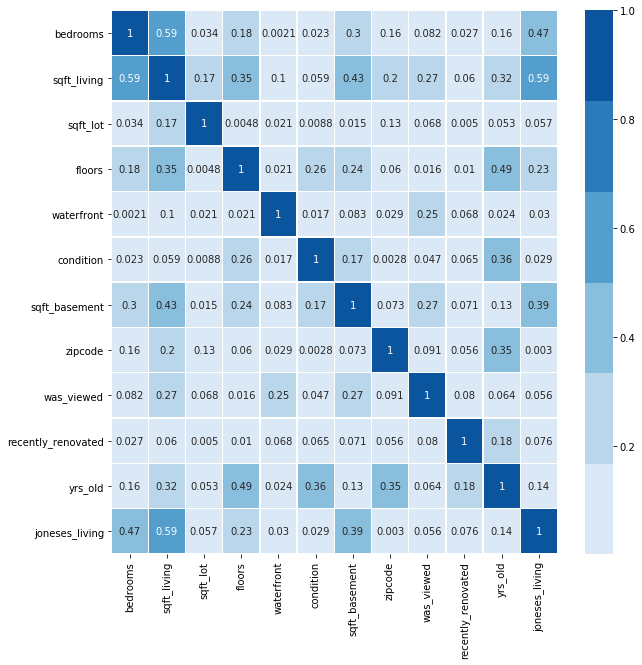

In [5]:
#Dropped all variables we aren't using (e.g. lat/long) or that are highly correlated (e.g. sqft_above, bathrooms, grade)
df_deps = df.drop(['id','price','lat','long','yr_renovated', 'yr_built','sqft_lot15','sqft_living15','sqft_above','bathrooms','grade','joneses_lot','view'], axis = 1)

#Check for correlation among candidate dependent variables
corr = df_deps.corr()
pl.figure(figsize=(10,10))
sns.heatmap(data=np.abs(corr), cmap=sns.color_palette('Blues'), annot=True, linewidths = .5)

**All correlations between candidate indepentent variables are <0.6 in magnitude**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000293B5474C50>,
      dtype=object)

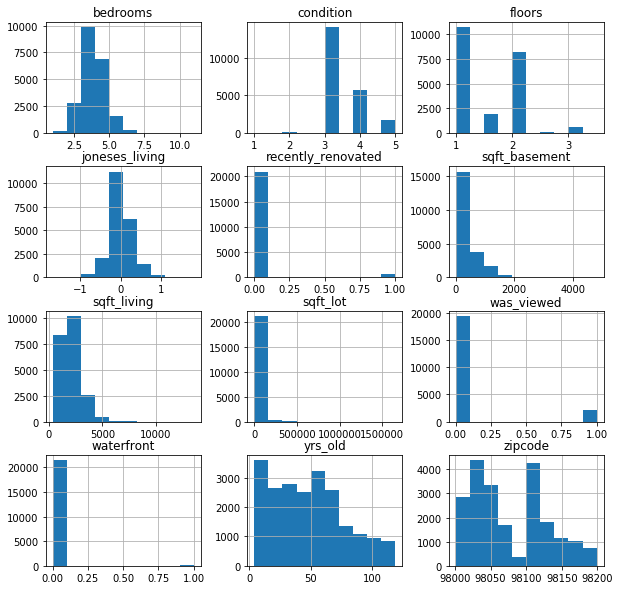

In [6]:
# Check for approximate normality of variables
df_deps.hist(figsize=(10,10))

**Several variables look skewed (e.g. sqft values and price), so we can try a log transformation in the next cleanup section**

<div class="alert alert-block alert-info">

## 3. Narrow Down Variables, Transform Variables 
    - Kill off obvious unusable variables  
    - Evaluate normality of target variables  
    - Decide on transformations / normalizations / standardizations  

<div class="alert alert-block alert-info">

|**Category**| Description | _Detail & Transformations_|
|---:|:---:|:---|
|**id** | dropped | |
|**date** | dropped  | |
| **price** |  **kept** |_dependent variable - log transformed_|
| **bedrooms** |  **kept** |  |
| **bathrooms** |  droped |   |
| **sqft_living** |  **kept**| _log transformed_ |
| **sqft_lot** |  **kept** | _log transformed_ |
| **floors** |  **kept** |  |
| **waterfront** | **kept** | _binary_ |
| **view** | dropped  |  |
| **was_viewed** | **constructed** | _binary was viewed between 1 and 4 times_ |
| **condition** | **kept**| |
| **grade** | dropped | |
| **sqft_above** | dropped | |
| **sqft_basement** | **kept** | |
| **yr_built** | dropped | |
| **yrs_old** | dropped | originally included, but condition number of regresion was 1.66e+03, indicating potential collinearity |
| **yr_renovated** | dropped | |
| **recently_renovated** | **constructed** |_binary - if rennovated after 1980, 1, otherwise, 0_|
| **zipcode** | **kept** |_categorical_|
| **lat** | dropped | |
| **long** | dropped | |
| **sqft_living15** | dropped | |
| **sqft_lot15** | dropped|  |
| **joneses_living** | **constructed** | _difference between log(sqft_living) and log(sqft_living15), or living space relative to closest 15 neighbors_ |


**Goal**: create a new DataFrame with just the variables we will use in the regressions, with zipcode as a column for future grouping

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000293B6665B00>,
      dtype=object)

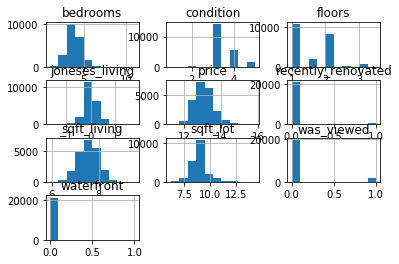

In [7]:
# Pulling in variables and transformations

#Importing several data fields as-is (converting zipcode to string from numeric)
df_reg = df[['recently_renovated','waterfront','zipcode','was_viewed','bedrooms','condition','floors']].copy()
df_reg['zipcode'] = df_reg['zipcode'].astype('str')
# 'yrs_old',

# sqft_living has a long tail for extreme high values - using log to normalize
df_reg['sqft_living'] = np.log(df['sqft_living'])

# sqft_lot has a long tail for extreme high values - using log to normalize
df_reg['sqft_lot'] = np.log(df['sqft_lot'])

# joneses_living pulling in as-is, it is already log-transformed
df_reg['joneses_living'] = df['joneses_living']

# Originally, price was the dependent variable, but using the log of price as the outcome fixed skewness / kurtosis / heteroskedasticity issues
df_reg['price'] = np.log(df['price'])

df_reg.hist()
#np.exp(df_reg['price']).describe()


<div class="alert alert-block alert-info">

## 4. Run Core Analyses
    - Create core multivariate analysis  
    - Create grouped multivariate analyses  
    - Evaluate statistical validity (p-values, skewness, kurtosis)  
    - Evaluate applicability (size of the effect, direction, does it make sense     

<div class="alert alert-block alert-info">

In [8]:
# Creating a formula to run a multivariate regression of all values in a regression, ignoring a single group column (zipcode)
def regress_grouped(data, outcome_val, group_col):
    outcome = outcome_val
    predictors = data.drop([outcome,group_col], axis=1)
    pred_sum = "+".join(predictors.columns)
    formula = outcome + "~" + pred_sum
    model = ols(formula= formula, data=data).fit()
    return model

regress_all = regress_grouped(df_reg, 'price', 'zipcode')
regress_all.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     2899.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:39:41   Log-Likelihood:                -8235.6
No. Observations:               21596   AIC:                         1.649e+04
Df Residuals:                   21586   BIC:                         1.657e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.4500      0.065     83.834      0.000       5.323       5.577
recently_renovated     0.2464      0.014     17.226      0.000       0.218       0.274
waterfront             0.5020      0.031     16.457      0.000       0.442       0.562
was_viewed             0.2258      0.009     25.775      0.000       0.209       0.243
bedrooms              -0.0558      0.004    -15.850      0.000      -0.063      -0.049
condition              0.0910      0.004     23.430      0.000       0.083       0.099
floors                 0.0585      0.005     10.699      0.000       0.048       0.069
sqft_living            1.0600      0.010    103.369      0.000       1.040       1.080
sqft_lot              -0.0716      0.003    -22.571      0.000      -0.078      -0.065
joneses_living        -0.3970      0.012    -34.411      0.000      -0.420      -0.374
==============================================================================
Omnibus:                       38.856   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.197
Skew:                           0.061   Prob(JB):                     2.28e-08
Kurtosis:                       2.844   Cond. No.                         351.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS Regression Results Discussion:  
- The variables are all exhibit very low p-values (<0.001) and the overall adjusted r-squared is high (54.7%), indicating that the dependent variables are explaining a high proportion of the variance and are all individually correlated
- Skew is <2 and Kurtosis is <3, indicating limited unusual residual patterning
- The value and direction of the intercepts largely follows intuition
    - **sqft_living** has the highest positive coefficient of 1.06, which follows as house size is generally a key factor in house price
    - **waterfront** surprisingly has a high coefficient of 0.5, but only a very small number of houses (<1%) have this, so it likely is a significant but not highly explanatory factor
    - **recently_renovated** and was_viewed are both high positive factors of 0.25 and 0.23 respectively - these make sense as more modern and more in-demand houses likely drive higher prices
    - **floors** and **condition** both had low positive coefficients, so are of relatively lower importance
- Several coefficients, however, cut against intuition
    - **joneses_living** has a significant negative coefficient of -0.39, compared to a positive sqft_living value of 1.06.  My interpretation here is that for a given house size, e.g. 2,000 feet, if all of your neighbors' houses are half the size, then you live in a neighborhood of small houses.  This property of your neighborhood may correlate with income, which may correlate with desireability of the neighborhood, or with schools, or with neighborhood prestige, any of which might negatively impact price.  This, vs. a house 2,000 sqft in a neighborhood of all 5,000 sqft houses, which might represent a small house in a nice, wealthy, prestigious neighborhood which has a halo effect on the price of your house. We can evaluate this by looking within zip codes further on to see if this effect on a smaller scale. I anticipate that given small enough geographic bins, this effect would reverse or disappear.
    - **sqft_lot** also has a slightly negative correlation with housing price (-0.07) - this I attribute to houses with large lots being in more distant and suburban / rural areas further from main centers of employment.  However, we can check this by analyzing houses within specific zip codes further on
    - **bedrooms** similarly is small but negative (-0.06), but with a small coefficient. My interpretation is that for a given house size, more bedrooms makes it a more cramped space, i.e. if shoppers are looking for a certain number of bedrooms, the ratio of bedrooms to space is important, and a low ratio is better.  **see below for an evaluation**


In [9]:
#testing bedroom hypothesis
df_reg_bedroom = df_reg.copy()
df_reg_bedroom['bedroom_ratio'] = df_reg_bedroom['sqft_living']/df_reg_bedroom['bedrooms']
df_reg_bedroom.drop('bedrooms', axis = 1, inplace = True)

regress_bedratio = regress_grouped(df_reg_bedroom, 'price', 'zipcode')
#regress_bedratio.summary()

Evaluating my hypothesis that a high ratio of square footage of living space to bedrooms is desireable, the newly constructed 'bedroom_ratio' value has a positive correlation with price in the otherwise same regression

In [10]:
df_reg_zipdummy = df_reg.copy()
df_reg_zipdummy['zipcode'] = 'zip'+df_reg_zipdummy['zipcode']
zipdummies = pd.get_dummies(df_reg_zipdummy.zipcode, drop_first = True)
for column in zipdummies:
    df_reg_zipdummy[column]=zipdummies[column]

regress_zipdummies = regress_grouped(df_reg_zipdummy, 'price', 'zipcode')
regress_zipdummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1722.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        08:39:42   Log-Likelihood:                 4588.0
No. Observations:               21596   AIC:                            -9018.
Df Residuals:                   21517   BIC:                            -8388.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.7559      0.044    129.715      0.000       5.669       5.843
recently_renovated     0.0859      0.008     10.748      0.000       0.070       0.102
waterfront             0.5871      0.017     34.307      0.000       0.554       0.621
was_viewed             0.1532      0.005     29.949      0.000       0.143       0.163
bedrooms              -0.0273      0.002    -13.793      0.000      -0.031      -0.023
condition              0.0396      0.002     17.850      0.000       0.035       0.044
floors                 0.0655      0.003     20.624      0.000       0.059       0.072
sqft_living            0.8002      0.006    124.731      0.000       0.788       0.813
sqft_lot               0.0651      0.002     30.685      0.000       0.061       0.069
joneses_living        -0.2444      0.007    -35.018      0.000      -0.258      -0.231
zip98002               0.0035      0.017      0.201      0.841      -0.031       0.038
zip98003               0.0395      0.016      2.531      0.011       0.009       0.070
zip98004               1.1858      0.015     77.781      0.000       1.156       1.216
zip98005               0.7818      0.018     42.411      0.000       0.746       0.818
zip98006               0.7055      0.014     51.321      0.000       0.679       0.732
zip98007               0.6936      0.020     35.545      0.000       0.655       0.732
zip98008               0.6831      0.016     43.653      0.000       0.652       0.714
zip98010               0.2250      0.022     10.117      0.000       0.181       0.269
zip98011               0.4478      0.017     25.636      0.000       0.414       0.482
zip98014               0.2821      0.021     13.697      0.000       0.242       0.322
zip98019               0.2897      0.018     16.445      0.000       0.255       0.324
zip98022               0.0465      0.017      2.805      0.005       0.014       0.079
zip98023              -0.0052      0.014     -0.384      0.701      -0.032       0.021
zip98024               0.4226      0.024     17.309      0.000       0.375       0.470
zip98027               0.5285      0.014     37.227      0.000       0.501       0.556
zip98028               0.4134      0.016     26.519      0.000       0.383       0.444
zip98029               0.6584      0.015     43.398      0.000       0.629       0.688
zip98030               0.0543      0.016      3.387      0.001       0.023       0.086
zip98031               0.0759      0.016      4.820      0.000       0.045       0.107
zip98032              -0.0029      0.020     -0.141      0.888      -0.043       0.037
zip98033               0.8255      0.014     58.815      0.000       0.798       0.853
zip98034               0.5675      0.013     42.574      0.000       0.541       0.594
zip98038               0.1597      0.0

### OLS Regression With Zipcode Dummies Results Discussion:

The core independent variables continue to exhibit very low p-values (<0.001) and the overall adjusted r-squared is significantly higher (86.1%) with the inclusion of zipcode dummy variables than without (54.7%), indicating that the zipcode variables are explaining a high proportion of the variance in housing prices beyond the individual home factors.

Several of the core independent variable coefficients change with the addition of zip code dummy variables, indicating that these variables previously were capturing latent charactaristics of zip codes rather than the actual incremental contribution of the variable to overall housing price:
- Generally, values either slightly attenuated or slightly improved. My interpretation of values that slighly attenuated are that the value (e.g. recently_renovated, which fell from 0.24 to 0.09) was previously an indicator of the uncaptured quality of the neighborhood (i.e. demand factors from buyers with higher general willingness to pay).  
- By contrast, the single value that increased slightly between the two regressions, **waterfront**, is an important indicator of house price that was being slightly obscured without being able to sort out the relative impact of zip code.
- One value flipped direction - **sqft_lot**, from slightly negative at -0.72 to slightly positive at 0.65 and my interpretation of this metric is that previously high sqft_lot values were capturing properties further from city centers, and that distance from shopping / businesses was decreasing value faster that large lot size was adding value.  However, by pulling out the level effect of zip codes from the analysis, we are able to isolate the positive effect of **sqft_lot**.
- Almost all of the zip code coefficients have very low p-values (<0.001), except for a few that exhibited both very low coefficient values and high p-values. Because we dropped the first zipcode from the list, that zipcode coefficient is already accounted for in the intercept value. These zip codes with close-to-zero coeficients and high p-values likely have values statistically indistinguishable from the first zip code that was dropped.  We should see these zip codes change back to non-zero values with low p-values if we change the zipcode we decided to drop.

<div class="alert alert-block alert-info">

## 5. Run Checks & Create Visuals   
    - Check alternate models, check alternate explanations of effects
    - Create easy to consume graphs / maps of data

<div class="alert alert-block alert-info">

174516.68611056352


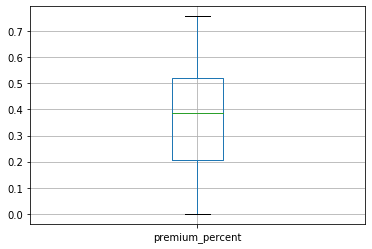

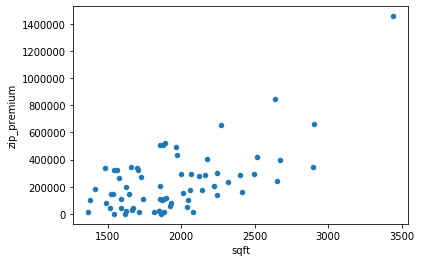

In [45]:

zip_intercept = regress_zipdummies.params[0]

def last_5_slice(x):
    sliced = x[3:]
    return sliced

df_reg_grouped = df_reg.groupby('zipcode')

def average_price_fromzip(zipcode):
    zip_data = df_reg_grouped.get_group(name = zipcode)
    avg_price =  zip_data['price'].mean()
    return avg_price

def average_sqft_fromzip(zipcode):
    zip_data = df_reg_grouped.get_group(name = zipcode)
    avg_price =  zip_data['sqft_living'].mean()
    return avg_price

#Creating zip-code level summaries of price, zipcode coefficient in dollars, and sqfootage
zip_params = pd.DataFrame(regress_zipdummies.params[10:])
zip_params['zipcode'] = list(zip_params.index)
zip_params['zipcode'] = zip_params['zipcode'].apply(last_5_slice)
zip_params['price'] = 0 
zip_params['price'] = zip_params['zipcode'].apply(average_price_fromzip)
zip_params['sqft'] = 0 
zip_params['sqft'] = np.exp(zip_params['zipcode'].apply(average_sqft_fromzip))
zip_params['price$'] = np.exp(zip_params['price'])
zip_params['zip_premium'] = zip_params['price$']-np.exp(zip_params['price']-zip_params[0])
zip_params['zip_premium'] = zip_params['zip_premium'] - min(zip_params['zip_premium'])
zip_params['premium_percent'] = zip_params['zip_premium'] / zip_params['price$']

print(zip_params['zip_premium'].median())

zip_params.boxplot('premium_percent')

zip_params.plot.scatter('sqft','zip_premium')

In [ ]:
# Folium Map Creation for Zips Function
# Table  = main data frame
# zips = column name containing zips
# mapped feature = column of values for zip heat map
# add test = commentary for the mpa
# https://towardsdatascience.com/visualizing-data-at-the-zip-code-level-with-folium-d07ac983db20

def create_zip_heatmap(table, zips, mapped_feature, add_text):
    # read in geo file
    kc_geo = open("Zip_Codes.json", "r")
    # initiating a Folium map with the KC Long / lat
    m = foium.Map(location = [47.4365, -122.1463], zoom_start = 11)
    # creating a choroplet map
    m.chloropleth(
        geo_data = kc_geo
        fill_opacity = 0.7
        line_opacity = 0.2
        data = zip_params
        # refers to key in the geojson file
        key_on = tbd
        # first element contains location information, second contains feature of interst
        columns = [zips, mapped_feature])
        fill_color = 'RdYlGn'
        legend_name = add_text
    )
    folium.LayerControl().add_to(m)
    m.save(outfile = mapped_feature + '_map.html')